# Este es el entregable de la práctica del módulo **NLP**

El objetivo de la práctica es realizar un análisis de sentimiento acerca de reviews de productos de Amazon.

En concreto se han elegido las categorías de reviews de Digital Music y Musical Instruments.

El formato por el que se ha optado para la presentación de la práctica es en un sólo notebook en el que se encuentran los cuatro ejercicios propuestos.

# **1. Descarga y exploración del corpus**

In [1]:
# Se conecta con google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Se accede a la carpeta de Google Drive donde están ubicados los archivos de las reviews sobre las que se va a trabajar
%cd /content/drive/MyDrive/NLP/

/content/drive/MyDrive/NLP


In [3]:
!ls -ll

total 139097
-rw------- 1 root root  32052614 Feb 12 22:22 reviews_Digital_Music_5.json.gz
-rw------- 1 root root   2460495 Feb 12 22:22 reviews_Musical_Instruments_5.json.gz
-rw------- 1 root root 107921815 Feb 15 23:56 w2v_sg_d200_mc5_w10.pkl


In [4]:
# Se descomprimen y se leen los datasets utilizando Pandas y se muestran las primeras filas 
import pandas as pd
dataDM = pd.read_json('reviews_Digital_Music_5.json.gz', lines = True, compression = 'gzip')
dataDM.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4,4.5; music to dream to,1200528000,"01 17, 2008"
5,A2P49WD75WHAG5,5555991584,Daniel J. Hamlow,"[62, 65]",Who knows why I initially considered this to b...,5,Dreamy unearthly magic continues with Eire's o...,1059523200,"07 30, 2003"
6,A3O90G1D7I5EGG,5555991584,dev1,"[1, 5]",Enya is one of a few artists whom I consider s...,3,Have You Hugged A Tree Today?,959385600,"05 27, 2000"
7,A3EJYJC25OJVKK,5555991584,"Distant Voyageur ""Nicholas Computer""","[5, 5]",Enya is one of of the most mysterious singers ...,5,The album for a romantic autumn evening,1040428800,"12 21, 2002"
8,A1DA8VOH9NR6C7,5555991584,E. Minkovitch,"[4, 4]",This is not another lousy Celtic New Age album...,5,Simply wonderful.,1167868800,"01 4, 2007"
9,A33TRNCQK4IUO7,5555991584,guillermoj,"[12, 12]","Many times, AND WITH GOOD REASON, the ""new age...",5,"A true gem, even if you don't love conventiona...",1052697600,"05 12, 2003"


In [5]:
dataMI = pd.read_json('reviews_Musical_Instruments_5.json.gz', lines = True, compression = 'gzip')
dataMI.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


Ahora se comprueba la forma de los datasets (las filas y columnas)

In [6]:
dataDM.shape

(64706, 9)

In [7]:
dataMI.shape

(10261, 9)

In [8]:
# Nombres de las columnas
dataDM.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [9]:
dataMI.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

Se concatenan los dos datasets (el de Digial Music y el de Musical Instruments) para trabajar con el dataset resultante.

In [10]:
data_inicial = pd.concat([dataDM, dataMI])
data_inicial.shape

(74967, 9)

Se comprueban los valores de la puntuación de cada review almacenadas en la variable Overall, y se crea una nueva variable que se llama sentiment_label a la que se le asigna un 0 si el valor de Overall es 1, 2 o 3 y un 1 si el valor de Overall es 4 o 5. De esa forma se establece que los valores 0 de la variable sentiment_label son negativos y los valores 1 son positivos.

In [11]:
set(data_inicial['overall'])

{1, 2, 3, 4, 5}

In [12]:
def label_sentiment(row):
    if int(row['overall']) < 4:
        return 0
    else:
        return 1

In [13]:
data_inicial['sentiment_label'] = data_inicial.apply(lambda row: label_sentiment(row), axis=1)

In [14]:
data_inicial.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment_label
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006",1
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001",1
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5,The best so far,1058140800,"07 14, 2003",1
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5,Ireland produces good music.,957312000,"05 3, 2000",1
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4,4.5; music to dream to,1200528000,"01 17, 2008",1
5,A2P49WD75WHAG5,5555991584,Daniel J. Hamlow,"[62, 65]",Who knows why I initially considered this to b...,5,Dreamy unearthly magic continues with Eire's o...,1059523200,"07 30, 2003",1
6,A3O90G1D7I5EGG,5555991584,dev1,"[1, 5]",Enya is one of a few artists whom I consider s...,3,Have You Hugged A Tree Today?,959385600,"05 27, 2000",0
7,A3EJYJC25OJVKK,5555991584,"Distant Voyageur ""Nicholas Computer""","[5, 5]",Enya is one of of the most mysterious singers ...,5,The album for a romantic autumn evening,1040428800,"12 21, 2002",1
8,A1DA8VOH9NR6C7,5555991584,E. Minkovitch,"[4, 4]",This is not another lousy Celtic New Age album...,5,Simply wonderful.,1167868800,"01 4, 2007",1
9,A33TRNCQK4IUO7,5555991584,guillermoj,"[12, 12]","Many times, AND WITH GOOD REASON, the ""new age...",5,"A true gem, even if you don't love conventiona...",1052697600,"05 12, 2003",1


In [15]:
freq = data_inicial.groupby(['sentiment_label']).count()
print(freq)

                 reviewerID   asin  ...  unixReviewTime  reviewTime
sentiment_label                     ...                            
0                     13829  13829  ...           13829       13829
1                     61138  61138  ...           61138       61138

[2 rows x 9 columns]


Se observa que existen 13829 reviews negativas y 61138 positivas. Para poder trabajar con el mismo número de reviews negativas que positivas, y, al mismo tiempo, reducir la cantidad de reviews con la que se trabaja para no tener problemas de rendimiento en google colab se va a proceder a eliminar 47309 reviews positivas para que se queden 13829 reviews positivas y 13829 reviews negativas.

In [16]:
data_negativas = data_inicial[data_inicial['sentiment_label'] == 0]
data_negativas.shape

(13829, 10)

In [17]:
data_positivas = data_inicial[data_inicial['sentiment_label'] == 1]
data_positivas.shape

(61138, 10)

In [18]:
data_positivas = data_positivas[:13829]
data_positivas.shape

(13829, 10)

In [19]:
data = pd.concat([data_negativas, data_positivas])
data.shape

(27658, 10)

In [20]:
freq = data.groupby(['sentiment_label']).count()
print(freq)

                 reviewerID   asin  ...  unixReviewTime  reviewTime
sentiment_label                     ...                            
0                     13829  13829  ...           13829       13829
1                     13829  13829  ...           13829       13829

[2 rows x 9 columns]


## Cardinalidad del vocabulario

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

Se juntan todas las reviews en una lista, luego se separan las palabras por espacios y se cuentan las diferentes palabras.

In [22]:
palabras_todas = []
for i in data.index:
  palabras_todas.append(data['reviewText'][i])
palabras_str = str(palabras_todas)
palabras = palabras_str.lower().split()
cont = Counter(palabras)
len(cont)

275066

Se puede observar que se han extraído 275066 tokens de todas las reviews.

Las palabras más comunes son las siguientes. Son stopwords, a excepción de la palabra 'album', que tratándose de reviews de música tiene sentido que sea así.

In [23]:
comunes = cont.most_common(20)
comunes

[('the', 249510),
 ('and', 135205),
 ('of', 122036),
 ('a', 118086),
 ('to', 97636),
 ('is', 91971),
 ('this', 66705),
 ('i', 58538),
 ('in', 55882),
 ('that', 55191),
 ('it', 49056),
 ('on', 46963),
 ('with', 41052),
 ('but', 36959),
 ('album', 36333),
 ('for', 33882),
 ('as', 33780),
 ('was', 31662),
 ('you', 29617),
 ('are', 29532)]

Las palabras más frecuentes se pueden representar en una gráfica de la siguiente forma.

In [24]:
palab = [w[0] for w in comunes]
frecuen = [w[1] for w in comunes]

In [25]:
frecuen, palab = zip(*sorted(zip(frecuen, palab)))

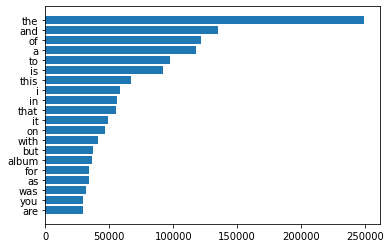

In [26]:
plt.barh(palab, frecuen)
plt.show()

## Distribución de reviews por número de estrellas

Se mira la frecuencia de cada valor del campo Overall

In [27]:
freq = data.groupby(['overall']).count()
print(freq)

         reviewerID   asin  ...  reviewTime  sentiment_label
overall                     ...                             
1              3008   3008  ...        3008             3008
2              3260   3260  ...        3260             3260
3              7561   7561  ...        7561             7561
4              3471   3471  ...        3471             3471
5             10358  10358  ...       10358            10358

[5 rows x 9 columns]


In [28]:
freq = freq.drop(freq.columns[[1,2,3,4,5,6,7,8]], axis='columns')
freq = freq.rename(columns={'reviewerID':'cantidad'})
print(freq)

         cantidad
overall          
1            3008
2            3260
3            7561
4            3471
5           10358


Se dibuja el gráfico de barras que representa la cantidad de reviews que tienen 1, 2, 3, 4 y 5 estrellas.

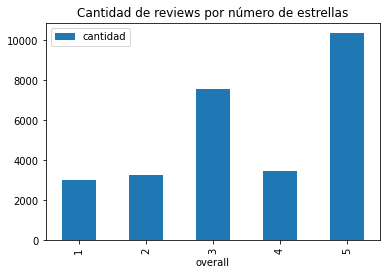

In [29]:
freq.plot(kind='bar', title='Cantidad de reviews por número de estrellas')

## Nº de reviews positivas y negativas

El dataset se dividió para que quedasen el mismo número de reviews positivas que negativas, por lo que se obtiene el mismo valor para ambas.

In [30]:
freqPN = data.groupby(['sentiment_label']).count()
print(freqPN)

                 reviewerID   asin  ...  unixReviewTime  reviewTime
sentiment_label                     ...                            
0                     13829  13829  ...           13829       13829
1                     13829  13829  ...           13829       13829

[2 rows x 9 columns]


In [31]:
freqPN = freqPN.drop(freqPN.columns[[1,2,3,4,5,6,7,8]], axis='columns')
freqPN = freqPN.rename(columns={'reviewerID':'cantidad'})
print(freqPN)

                 cantidad
sentiment_label          
0                   13829
1                   13829


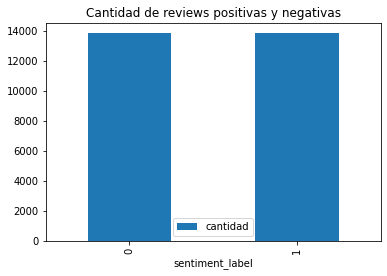

In [32]:
freqPN.plot(kind='bar', title='Cantidad de reviews positivas y negativas')

## N-grams más frecuentes

In [33]:
from nltk import ngrams
from nltk.probability import FreqDist

Se calculan los bigramas y trigramas de la lista calculada anteriormente de todas las palabras de las reviews.

In [34]:
bigramas = list(ngrams(palabras, 2))
trigramas = list(ngrams(palabras, 3))

In [35]:
bigramas[:10]

[('["enya', 'is'),
 ('is', 'one'),
 ('one', 'of'),
 ('of', 'a'),
 ('a', 'few'),
 ('few', 'artists'),
 ('artists', 'whom'),
 ('whom', 'i'),
 ('i', 'consider'),
 ('consider', 'successful')]

In [36]:
trigramas[:10]

[('["enya', 'is', 'one'),
 ('is', 'one', 'of'),
 ('one', 'of', 'a'),
 ('of', 'a', 'few'),
 ('a', 'few', 'artists'),
 ('few', 'artists', 'whom'),
 ('artists', 'whom', 'i'),
 ('whom', 'i', 'consider'),
 ('i', 'consider', 'successful'),
 ('consider', 'successful', 'at')]

In [37]:
bg_freq = FreqDist(bigramas)
tg_freq = FreqDist(trigramas)

Los bigramas más frecuentes son los siguientes:

In [38]:
bg_freq.most_common(10)

[(('of', 'the'), 31583),
 (('in', 'the'), 15077),
 (('is', 'a'), 14775),
 (('on', 'the'), 12476),
 (('this', 'album'), 12123),
 (('and', 'the'), 10614),
 (('one', 'of'), 10119),
 (('to', 'the'), 9590),
 (('this', 'is'), 8836),
 (('the', 'album'), 7485)]

Y los trigramas más frecuentes los siguientes:

In [39]:
tg_freq.most_common(10)

[(('one', 'of', 'the'), 5598),
 (('is', 'one', 'of'), 2910),
 (('this', 'album', 'is'), 2739),
 (('name:', 'reviewtext,', 'dtype:'), 2478),
 (('reviewtext,', 'dtype:', 'object,'), 2478),
 (('some', 'of', 'the'), 2094),
 (('a', 'lot', 'of'), 2050),
 (('this', 'is', 'a'), 2013),
 (('the', 'rest', 'of'), 1696),
 (('of', 'the', 'best'), 1674)]

Viendo el resultado obtenido en los bigramas y trigramas más frecuentes se puede concluir que es necesario eliminar las stopwords, para poder obtener bigramas y trigramas de palabras que aporten valor.

A continuación se grafica la cantidad de bigramas y trigramas más frecuentes.

In [40]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [41]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

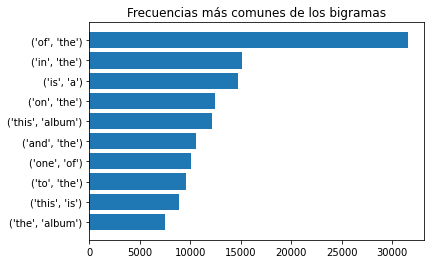

In [42]:
plt.barh(bgs_, bgs_f_)
plt.title('Frecuencias más comunes de los bigramas')
plt.show()

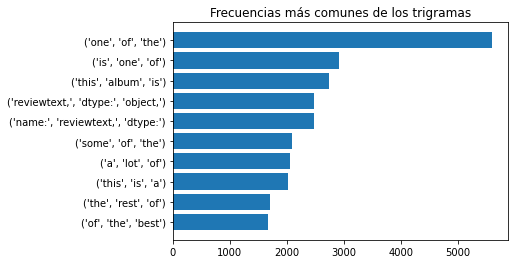

In [43]:
plt.barh(tgs_, tgs_f_)
plt.title('Frecuencias más comunes de los trigramas')
plt.show()

## Nubes de palabras

In [44]:
from wordcloud import WordCloud

In [45]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

En la nube de palabras se observa que las palabras que tienen un mayor peso están relacionadas con la música, ya que se trata de reviews de música.

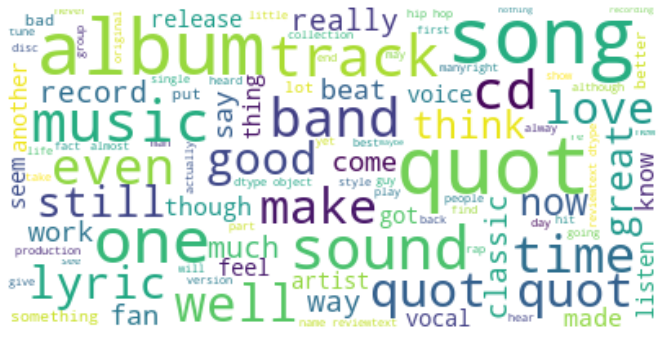

In [46]:
plot_word_cloud(palabras)

## Visualización Word2Vec

In [47]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
import numpy as np

Se seleccionan todos los textos de las reviews como corpus con el que se trabajará.

In [48]:
corpus = data['reviewText'].str.split()

Se establecen los valores de los hiperparámetros. En este caso se ha optado por:
- Un tamaño de 200 palabras.
- Una ventana de 10 palabras para obtener el contexto de cada palabra.
- Una frecuencia mínima de cada palabra para que se considere en el entrenamiento de 5.
- El algoritmo elegido ha sido el Skip-Gram, porque es el que funciona mejor con conjuntos de datos pequeños.
- Se utiliza negative sampling, para maximizar la similaridad de las palabras del mismo contexto y minimizarla cuando se trate de palabras que se encuentren en diferentes contextos.
- Se selecciona un valor para negative sampling de 20 porque se trabaja con un dataset pequeño, si el dataset fuese más grande, el valor seleccionado sería más pequeño.

In [49]:
sg_params = {
    'size': 200,
    'window': 10,
    'min_count': 5,
    'sg': 1,
    'hs': 0,
    'negative': 20
}

Inicialización de los objetos Word2Vec

In [50]:
w2v_sg = Word2Vec(**sg_params)

Construcción del vocabulario

In [51]:
w2v_sg.build_vocab(corpus)

In [52]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_sg.wv.vocab)))

Vocabulario compuesto por 43724 palabras


Se realiza el entrenamiento de los pesos de los embeddings

In [53]:
#w2v_sg.train(sentences=corpus, total_examples=w2v_sg.corpus_count, epochs=10)

Se almacena el modelo

In [54]:
#w2v_sg.save('./w2v_sg_d200_mc5_w10.pkl')

Se carga el modelo almacenado (para no tener que volver a ejecutarlo)

In [55]:
w2v_sg = Word2Vec.load('./w2v_sg_d200_mc5_w10.pkl')

Visualización

Se crean clusters de palabras similares a las proporcionadas

In [56]:
keys = ['singer', 'good', 'sound', 'price']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [57]:
print(word_clusters)

[['vocalist', 'singer,', 'singer.', 'songwriter', 'lead', 'vocalist,', 'singer)', 'guitarist', 'Luttrell', 'extraordinaire'], ['great', 'good,', 'decent', 'nice', 'fine', 'solid', 'bad', 'overexposed.', 'good.', "well.It's"], ['sounds', 'sound,', 'sound.', 'sounding', 'spatial', 'crisper', 'muddy.', 'sounded', 'behringer', 'soundstage'], ['price,', '$2', 'admission.', 'price.', 'price!', 'admission', '$30', 'steep', '$20', 'affordable']]


Se reduce la dimensionalidad a 2D para poder representarlo en la gráfica

In [58]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [59]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [60]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Se realiza la gráfica en la que se representan en 2D los embeddings

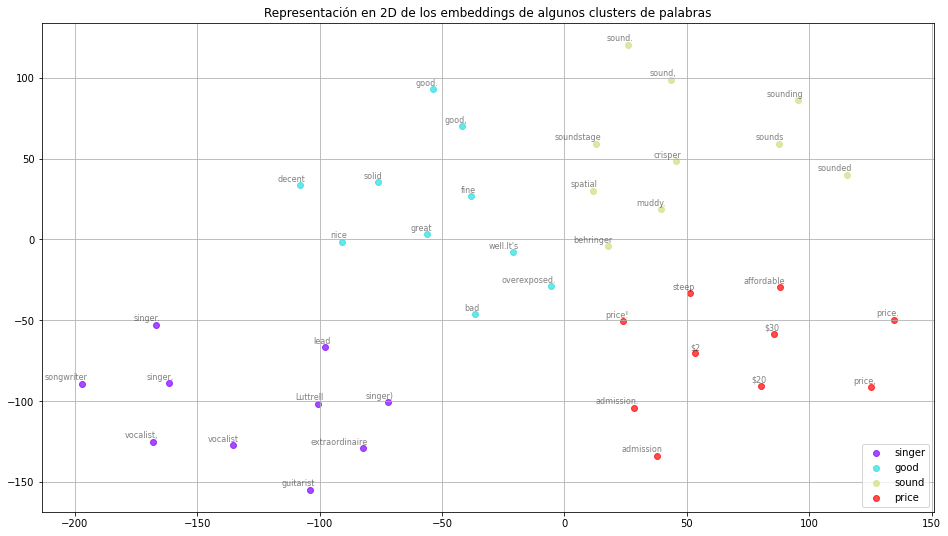

In [61]:
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## **Conclusiones**

Las conclusiones que se pueden sacar de la fase de exploración del corpus son las siguientes:
- Para obtener resultados buenos es necesario realizar una limpieza de los datos, eliminando las stopwords (que son las palabras más frecuentes y también forman parte de los bigramas y trigramas más frecuentes). También hay que limpiar los signos de puntuación pegados a las palabras.
- Las palabras con más peso en la nube de palabras son de la temática de música, y tiene sentido, ya que las reviews son de música.

# **2. Preprocesado de texto**

En la fase de preprocesado se preprocesa el texto de las reviews para limpiarlo y dejarlo preparado para la siguiente fase de entrenamiento del modelo.

In [62]:
! pip install num2words

     |████████████████████████████████| 101 kB 4.8 MB/s 


Se genera una función que realiza la limpieza para cada review. En concreto elimina los acentos, los signos de puntuación, las stopwords, los espacios sobrantes, convierte todas las letras en minúsculas, realiza la lematización, y convierte los dígitos en palabras.

In [63]:
import unicodedata
from num2words import num2words

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    clean_text = list()
    
    # Eliminar acentos, etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):
        
        # Eliminar stop words
        if word not in sw_list:
            
        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
            clean_word = lemmatizer.lemmatize(word).lower().strip()
        
        # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)
            
    return ' '.join(clean_text)

La siguiente función se encarga de recorrer todas las reviews del dataset y de pasárselas a la función de limpieza anterior para que las procese todas una a una.

In [64]:
def sentence_cleaner(text, tokenizer, sw_list, lemmatizer):
  sentences = []
  for s in data['reviewText']:
    sent_prep = nltk_cleaner(s, tokenizer, sw_list, lemmatizer)
    sentences.append(sent_prep)
  return sentences

Con respecto a las stopwords, se descargan las de nltk, que son con las que se va a trabajar

In [65]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Para realizar la lematización se utiliza wordnet de nltk

In [66]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


A continuación se define RegexpTokenizer como el tokenizador que se va a utilizar, el cual permite utilizar regex. También se definen las stopwords a utilizar en el idioma inglés, porque las reviews están en inglés.

In [67]:
tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

Se ejecuta la función creada anteriormente, la cual recorre todas las reviews y realiza la limpieza del texto. El resultado de cada review preprocesada se almacena en el mismo dataset en una nueva columna llamada 'reviewText_prep'.

In [68]:
data['reviewText_prep'] = sentence_cleaner(data['reviewText'], tokenizer, sw_list, lemmatizer)

Con el objetivo de comprobar que el preprocesado de los textos de las reviews se está haciendo correctamente, a continuación se muestra un texto de una review sin preprocesar y luego preprocesado. Como se puede observar, el preprocesado está funcionando correctamente.

In [69]:
data['reviewText'][6]

"Enya is one of a few artists whom I consider successful at creating this type of electronic atmospheric and dreamlike music. For certain, The Memory Of Trees is melodic, romantic and sensuous. Roma Ryan's lyrics, sung in  Gaelic by Enya (Athair Ar Neamh), float gently like pillow-soft white  clouds. The compositions are relaxing and harmonious (Tea House Moon),  dreamlike and filled with mystery (Once You Had Gold), and include subtle  touches of Celtic tradition (Enya's phrasing on `Hope Has A Place'). The CD  is a quiet and lush alternative to ninety-percent of the popular music on  the market today, and also a welcome substitute for the often hectic pace  of daily life. Enya's arrangement of the compositions on Memory is well  thought - the comparatively dramatic and uplifting `Anywhere Is' and `On My  Way Home' are placed so that the listener doesn't fall asleep.However,  I'm very leery when I read a dozen reviews of a particular musical release,  and all the writers rate the arti

In [70]:
data['reviewText_prep'][6]

'enya one artist i consider successful creating type electronic atmospheric dreamlike music for certain the memory of trees melodic romantic sensuous roma ryan lyric sung gaelic enya athair ar neamh float gently like pillow soft white cloud the composition relaxing harmonious tea house moon dreamlike filled mystery once you had gold include subtle touch celtic tradition enya phrasing hope has a place the cd quiet lush alternative ninety percent popular music market today also welcome substitute often hectic pace daily life enya arrangement composition memory well thought comparatively dramatic uplifting anywhere is on my way home placed listener fall asleep however i leery i read dozen review particular musical release writer rate artist work five star my hesitation matter taste listener free condemn rave whatever please one perspective is the memory of trees musical ground breaking effort does introduce unique technique significantly alter current genre popular music on close listenin

# **3. Entrenamiento y testeo de dos modelos de análisis de sentimiento**

Se divide el dataset en el conjunto de entrenamiento y el de test con los siguientes argumentos:
- Se destina el 75% de los datos para el entrenamiento y el 25% restante para el test.
- Se establece una semilla. 
- Se habilita el parámetro shuffle para desordenar los registros previamente. 
- Al parámetro stratify se le asigna la característica 'sentiment_label' del dataset para que se realice la división manteniendo la misma proporción de valores que tenían en la característica objetivo.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data['reviewText_prep'],
    data['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify = data['sentiment_label']
)

Se realiza la extracción de características mediante TfidVectorizer, al cual se le pasan los siguientes argumentos:
- Se extraen valores de 1 a 3 n-gramas.
- Se ignoran los términos que poseen una frecuencia mayor que el 95%.
- Se ignoran los tokens que poseen una frecuencia menor de 3 veces.
- Se establece un número máximo de características del vocabulario de 30000.

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.95,
    min_df=3,
    max_features=30000
)
vec.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=30000, min_df=3, ngram_range=(1, 3))

In [73]:
len(vec.vocabulary_.items())

30000

In [74]:
X_train_ = vec.transform(X_train)
X_test_ = vec.transform(X_test)

Se realiza el entrenamiento de los modelos. 

Primero se aplica la Regresión logística.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)
    
    lr_train_predict = lr.predict(X_train_)
    lr_test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={} - train:{} - test:{}".format(c, accuracy_score(y_train, lr_train_predict), accuracy_score(y_test, lr_test_predict)))
    
    train_acc.append(accuracy_score(y_train, lr_train_predict))
    test_acc.append(accuracy_score(y_test, lr_test_predict))

Accuracy for C=0.01 - train:0.7826736730463288 - test:0.7839479392624729
Accuracy for C=0.05 - train:0.839704960709637 - test:0.8396240057845263
Accuracy for C=0.25 - train:0.8898905654919732 - test:0.8724511930585683
Accuracy for C=0.5 - train:0.9107168683411271 - test:0.883297180043384
Accuracy for C=1 - train:0.9296148098153594 - test:0.8908170643528561
Accuracy for C=10 - train:0.9912741647784795 - test:0.8984815618221258
Accuracy for C=100 - train:0.9999517909656269 - test:0.8922631959508315


Después se aplica el clasificador de gradient boosting.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=32, learning_rate=1.0, max_depth=1, random_state=42)

gbc.fit(X_train_, y_train)

gbc_train_predict = gbc.predict(X_train_)
gbc_test_predict = gbc.predict(X_test_)

print("[{}] Accuracy: train = {}, test = {}".format(
        gbc.__class__.__name__,
        gbc.score(X_train_, y_train),
        gbc.score(X_test_, y_test)))

[GradientBoostingClassifier] Accuracy: train = 0.772260521621752, test = 0.7694866232827188


Se van a calcular las métricas de ambos modelos para poder analizar y comparar los resultados.

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

print('Logistic Regression - Confussion matrix:\n{}'.format(confusion_matrix(y_test, lr_test_predict)))
print('\nLogistic Regression - Classification report:\n{}'.format(classification_report(y_test, lr_test_predict)))
print('Logistic Regression - Accuracy score:{}'.format(accuracy_score(y_test, lr_test_predict)))

Logistic Regression - Confussion matrix:
[[3056  402]
 [ 343 3114]]

Logistic Regression - Classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3458
           1       0.89      0.90      0.89      3457

    accuracy                           0.89      6915
   macro avg       0.89      0.89      0.89      6915
weighted avg       0.89      0.89      0.89      6915

Logistic Regression - Accuracy score:0.8922631959508315


In [78]:
print('Gradient Boosting - Confussion matrix:\n{}'.format(confusion_matrix(y_test, gbc_test_predict)))
print('\nGradient Boosting - Classification report:\n{}'.format(classification_report(y_test, gbc_test_predict)))
print('Gradient Boosting - Accuracy score:{}'.format(accuracy_score(y_test, gbc_test_predict)))

Gradient Boosting - Confussion matrix:
[[2703  755]
 [ 839 2618]]

Gradient Boosting - Classification report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3458
           1       0.78      0.76      0.77      3457

    accuracy                           0.77      6915
   macro avg       0.77      0.77      0.77      6915
weighted avg       0.77      0.77      0.77      6915

Gradient Boosting - Accuracy score:0.7694866232827188


Como se puede observar en los resultados de las métricas, el modelo que ofrece mejores resultados, tanto en precision, como en recall y f1-score es el de la **Regresión Logística**.

Se han utilizado dos modelos sencillos, que se ejecutan muy rápidamente y, sobre todo el de la regresión logística, ofrece unos buenos resultados.

Sería muy interesante probar algún modelo de deep learning, sobre todo para ver si ofrecía mejores resultados que el de la regresión logística, pero por limitaciones de tiempo no se ha podido abordar en esta práctica.

# **4. Reporte de métricas y conclusiones**

En el paso anterior se ha determinado que el modelo que tenía mejores resultados era el de la Regresión Logística. En este paso se van a analizar los valores obtenidos en las métricas de dicho modelo.

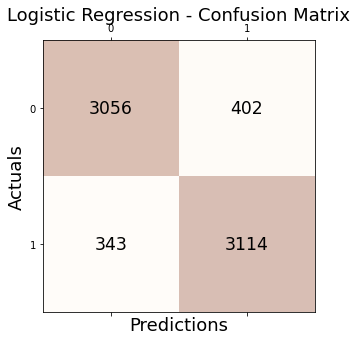

In [79]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, lr_test_predict)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - Confusion Matrix', fontsize=18)
plt.show()

En la matriz de confusión se observa qué tipo de errores se cometen. Los valores obtenidos son: 
- TN = 3056 (se ha predecido 0 y ha acertado)
- FN = 343 (se ha predecido 0 y en realidad era 1)
- FP = 402 (se ha predecido 1 y en realidad era 0)
- TP = 3114 (se ha predecido 1 y ha acertado)

In [80]:
print('\nLogistic Regression - Classification report:\n{}'.format(classification_report(y_test, lr_test_predict)))
print('Logistic Regression - Accuracy score:{}'.format(accuracy_score(y_test, lr_test_predict)))


Logistic Regression - Classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3458
           1       0.89      0.90      0.89      3457

    accuracy                           0.89      6915
   macro avg       0.89      0.89      0.89      6915
weighted avg       0.89      0.89      0.89      6915

Logistic Regression - Accuracy score:0.8922631959508315


La métrica de **precision** (precisión) mide la calidad del modelo en tareas de clasificación. Se representa por la proporción de verdaderos positivos dividido entre todos los resultados positivos (tanto verdaderos positivos, como falsos positivos), es decir, es el porcentaje de casos positivos detectados, y se calcula como TP/(TP+FP), o lo que es lo mismo, la cantidad de positivos predecidos correctamente / todos los que se han predecido como positivos.

La precision obtenida ha sido de 0.9 para las reviews negativas y de 0.89 para las positivas, por lo que se trata de valores similares y bastante buenos.

La métrica de **recall** (exhaustividad o sensibilidad) indica la cantidad que el modelo es capaz de identificar. Se representa por la proporción de casos positivos que han sido correctamente identificados por el modelo. Se calcula como TP/(TP+FN), es decir, la cantidad de positivos predecidos correctamente / todos los que realmente son positivos.

El recall obtenido ha sido de 0.88 para las reviews negativas y de 0.9 para las positivas. Al igual que en la precisión, se trata de valores similares y aceptables.

La métrica de **f1-score** (valor-f) combina las métricas de precision y recall en un sólo valor. El cálculo se realiza haciendo la media armónica entre precision y recall. Esta métrica asume que precision y recall tienen la misma importancia, pero eso no siempre es así. Es de más utilidad cuando la distribución de las clases es desigual, en este caso, la distribución de las clases es igual, por lo que esta métrica no tiene mucha importancia aquí. Se calcula como 2 * (recall * precision) / (recall + precision).

Los valores de f1-score han sido iguales para las reviews negativas y positivas, de 0.89. Pero tal y como se ha indicado anteriormente, esta métrica no tiene mucha importancia en este caso porque la distribución de clases es igual.

La métrica de **accuracy** (exactitud) mide el porcentaje de casos en el que el modelo ha acertado, o sea, la cantidad de predicciones positivas que fueron correctas. Se representa como la proporción de resultados verdaderos (tanto TP como TN) dividido entre el número total de casos examinados(TP, FP, TN, FN), es decir, se calcula como (TP+TN)/(TP+FP+FN+TN).

El accuracy obtenido es de 0.89, que considerando la simplicidad del modelo, se puede considerar como aceptable.

## **Conclusiones**
Se puede observar que los valores obtenidos en las diferentes métricas son similares y bastante aceptables para ambas clases (entre 0.88 y 0.9), lo que indica que el modelo de Regresión Logística funciona bien en las dos clases (0 = reviews negativas, y 1 = reviews positivas).

Con un modelo sencillo y rápido de ejecutar se ha obtenido unos buenos resultados y superiores a los obtenidos en el modelo de Gradient Boosting.

Sería interesante probar con diferentes modelos, sobre todo de redes neuronales, pero por falta de tiempo no se ha podido abordar en esta práctica.